# WeatherPy

---

## Observable Trends for WeatherPy
Using the OpenWeatherMap API, it shows that the temperatures are higher closer to the Equator (0° latitude) for both, northern and southern hemispheres. The maximum temperatures are lower for northern hemisphere than those in southern hemisphere. There seems to be very little to no correlation between humidity and latitude, as well as cloudiness and latitude. The scatter plots show evenly spread values across the latitudes. Wind speed seems to be similar for latitudes close to the equator (latitudes between 0 and 40 degrees, in both hemispheres).

In [41]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
import json
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [42]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 591


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [43]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
unit = "Imperial"
api = "&APPID=" + weather_api_key
 
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
     
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key +"&q="  
   
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    city_weather = requests.get(city_url + city).json()
  
  
# Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
    
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data response = requests.get(query_url + city).json()
        city_weather = requests.get(city_url + city).json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
        
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | olgii
City not found. Skipping...
Processing Record 2 of Set 1 | taiohae
City not found. Skipping...
Processing Record 3 of Set 1 | tiksi
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | sinabang
Processing Record 6 of Set 1 | papatowai
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | fuvahmulah
City not found. Skipping...
Processing Record 9 of Set 1 | khandyga
Processing Record 10 of Set 1 | sovetskaya gavan'
Processing Record 11 of Set 1 | socorro
Processing Record 12 of Set 1 | leh
Processing Record 13 of Set 1 | gebeit
Processing Record 14 of Set 1 | ilulissat
Processing Record 15 of Set 1 | puerto natales
Processing Record 16 of Set 1 | broome
Processing Record 17 of Set 1 | flying fish cove
Processing Record 18 of Set 1 | san antonio de pale
Processing Record 19 of Set 1 | adamstown
Processing Record 20 of Set 1 | blackmans bay
Processing

Processing Record 37 of Set 4 | pimentel
Processing Record 38 of Set 4 | uruacu
Processing Record 39 of Set 4 | kenai
Processing Record 40 of Set 4 | san patricio
Processing Record 41 of Set 4 | rongelap
Processing Record 42 of Set 4 | klyuchi
Processing Record 43 of Set 4 | westport
Processing Record 44 of Set 4 | port elizabeth
Processing Record 45 of Set 4 | mournies
Processing Record 46 of Set 4 | hithadhoo
Processing Record 47 of Set 4 | kapuskasing
Processing Record 48 of Set 4 | bich'vinta
Processing Record 49 of Set 4 | roccella ionica
Processing Record 0 of Set 5 | antalaha
Processing Record 1 of Set 5 | kodiak
Processing Record 2 of Set 5 | hermanus
Processing Record 3 of Set 5 | bugarama
Processing Record 4 of Set 5 | basawul
Processing Record 5 of Set 5 | senj
Processing Record 6 of Set 5 | chita
Processing Record 7 of Set 5 | nova zagora
Processing Record 8 of Set 5 | kaga bandoro
Processing Record 9 of Set 5 | mejit
Processing Record 10 of Set 5 | aykhal
Processing Record

Processing Record 32 of Set 8 | susuman
Processing Record 33 of Set 8 | chiili
City not found. Skipping...
Processing Record 34 of Set 8 | puri
Processing Record 35 of Set 8 | soe
Processing Record 36 of Set 8 | chiautla de tapia
Processing Record 37 of Set 8 | la passe
Processing Record 38 of Set 8 | abu qurqas
Processing Record 39 of Set 8 | prince rupert
Processing Record 40 of Set 8 | barakani
Processing Record 41 of Set 8 | pisco
Processing Record 42 of Set 8 | inyonga
Processing Record 43 of Set 8 | matoury
Processing Record 44 of Set 8 | al majaridah
Processing Record 45 of Set 8 | lincoln
Processing Record 46 of Set 8 | bitam
Processing Record 47 of Set 8 | anshun
Processing Record 48 of Set 8 | boende
Processing Record 49 of Set 8 | luba
Processing Record 0 of Set 9 | sanctuary point
Processing Record 1 of Set 9 | kikwit
Processing Record 2 of Set 9 | paka
Processing Record 3 of Set 9 | penzance
Processing Record 4 of Set 9 | porto santo stefano
Processing Record 5 of Set 9 | 

Processing Record 21 of Set 12 | curillo
Processing Record 22 of Set 12 | porto velho
Processing Record 23 of Set 12 | bairnsdale
Processing Record 24 of Set 12 | ust-tsilma
Processing Record 25 of Set 12 | sangin
Processing Record 26 of Set 12 | sao jose da coroa grande
Processing Record 27 of Set 12 | lexington park
Processing Record 28 of Set 12 | saudarkrokur
Processing Record 29 of Set 12 | tazacorte
Processing Record 30 of Set 12 | whakatane
Processing Record 31 of Set 12 | totness
Processing Record 32 of Set 12 | luza
Processing Record 33 of Set 12 | katsuren-haebaru
Processing Record 34 of Set 12 | maputo
Processing Record 35 of Set 12 | long jetty
Processing Record 36 of Set 12 | gereshk
Processing Record 37 of Set 12 | frostburg
Processing Record 38 of Set 12 | nova xavantina
Processing Record 39 of Set 12 | guaramirim
Processing Record 40 of Set 12 | inirida
-----------------------------
Data Retrieval Complete      
-----------------------------


In [44]:
# Convert the cities weather data into a Pandas DataFrame
#city_data_df = pd.DataFrame(city_data)
city_data_df = pd.read_csv("output_data/cities.csv")
# Show Record Count
city_data_df.count()

City_ID       577
City_ID.1     577
City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       574
Date          577
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


In [45]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [46]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City_ID.2,City_ID.1,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,,,
0,0,0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,1,1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,2,2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,3,3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,4,4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

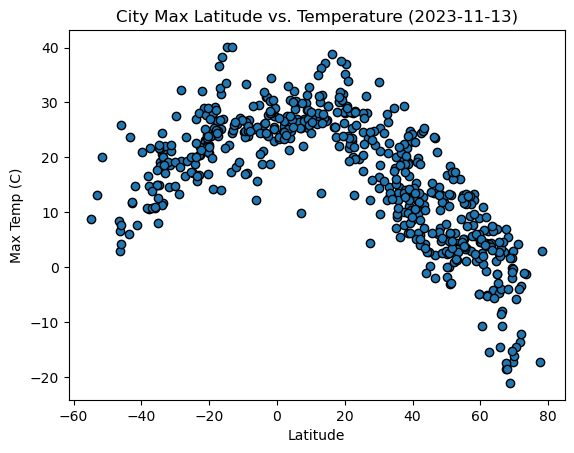

In [20]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", marker="o")
today_dt = datetime.date(datetime.now())
# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Temperature ({today_dt})" )
plt.ylabel("Max Temp (C)")
plt.xlabel("Latitude")
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

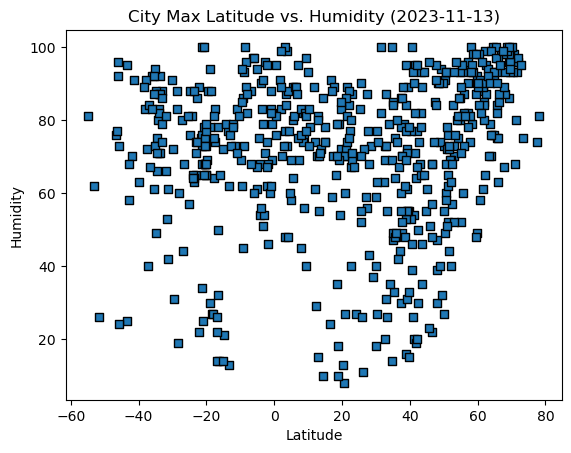

In [21]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", marker="s")

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Humidity ({today_dt})" )
plt.ylabel("Humidity")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

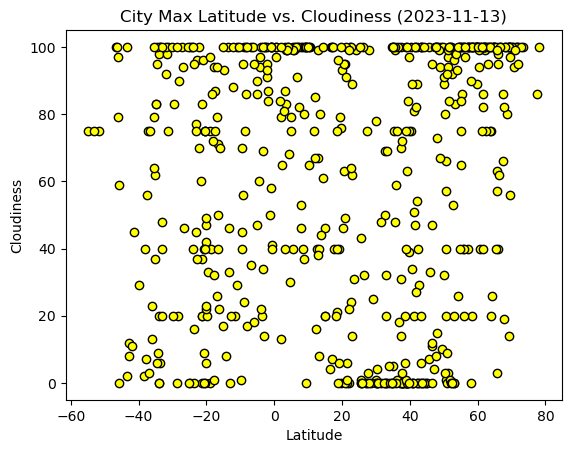

In [22]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", marker="o", color="yellow")
# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Cloudiness ({today_dt})")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
 

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

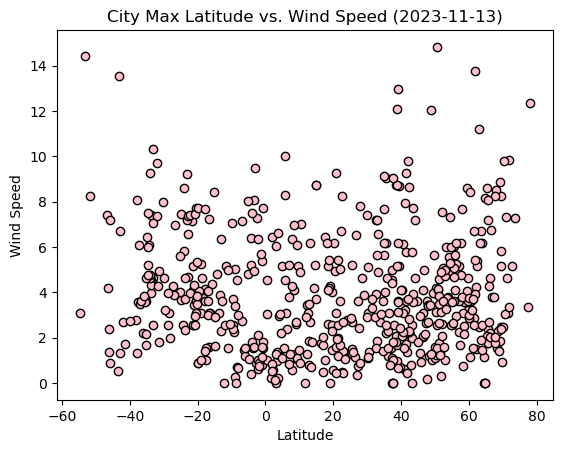

In [24]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", marker="o", color="pink")


# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Wind Speed ({today_dt})")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [55]:
# Define a function to create Linear Regression plots
def lin_reg(x_value, y_value, x_label, y_label, hemisphere, reg_cl, scat_mk, scat_cl, fig_name,  text_coordinates, ylim=None):
    # calculate the correlation
    lin_reg_corr=(x_value,y_value,[0],2)
    # calculate the linear regression
    # (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    lin_reg_model=st.linregress(x_value,y_value)
    # Create line equation string
    line_eq = "y = " + str(round(lin_reg_model.slope,2)) + "x +" + str(round(lin_reg_model.intercept,2))
    # create the scatter plot
    plt.scatter(x_value, y_value, marker=scat_mk, color=scat_cl)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f"{hemisphere} Hemisphere - City Latitude vs {y_label}")
    # equation of the line y = M * X + B
    y = lin_reg_model.slope*x_value+lin_reg_model.intercept
    plt.plot(x_value, y, linewidth=2, markersize=12, color=reg_cl)
    plt.annotate(line_eq, text_coordinates, fontsize=20, color=reg_cl)
    plt.savefig(fig_name)
    print(f"The r-squared is: {lin_reg_model.rvalue**2}")
    correlation = st.pearsonr(x_value,y_value)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    plt.show()   
    

In [27]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df
northern_hemi_df = northern_hemi_df.loc[(northern_hemi_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City_ID.1,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,,
0,0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [30]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df
southern_hemi_df = southern_hemi_df.loc[(southern_hemi_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City_ID.1,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,,
2,2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7161472181434125
The correlation between both factors is -0.85


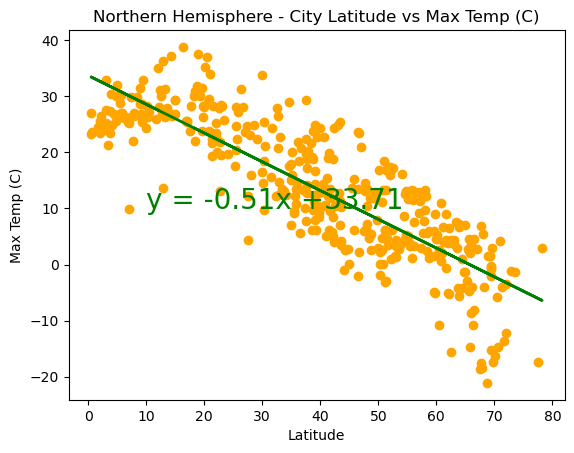

In [56]:
# Linear regression on Northern Hemisphere
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Max Temp"]
x_label = "Latitude"
y_label = "Max Temp (C)"
hemisphere = "Northern" 
scat_mk = "o" 
scat_cl = "orange"
reg_cl = "green"
fig_name = "north_hem_Lat_temp"
lin_reg(x_value, y_value, x_label, y_label, hemisphere, reg_cl, scat_mk, scat_cl, fig_name, (10, 10))


The r-squared is: 0.4121057168607252
The correlation between both factors is 0.64


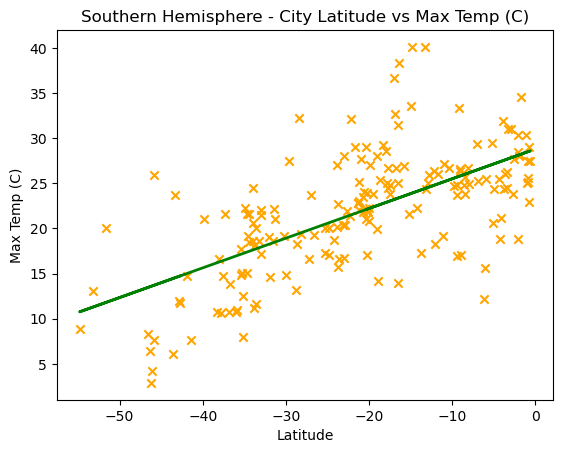

In [64]:
# Linear regression on Southern Hemisphere
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Max Temp"]
x_label = "Latitude"
y_label = "Max Temp (C)"
hemisphere = "Southern" 
scat_mk = "x" 
scat_cl = "orange"
reg_cl = "green"
fig_name = "south_hem_Lat_temp"
lin_reg(x_value, y_value, x_label, y_label, hemisphere, reg_cl, scat_mk, scat_cl, fig_name, (10, 10))


**Discussion about the linear relationship:** 
There is a clear correlation between Latitude and temperature.  The closer to 0degrees latitude the higher the temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.05689741545789608
The correlation between both factors is 0.24


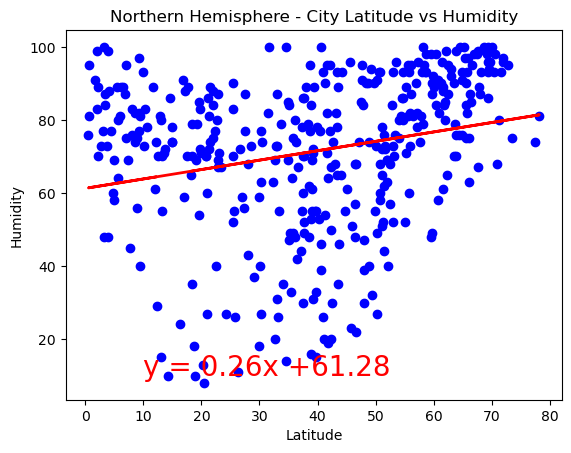

In [59]:
# Northern Hemisphere
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Humidity"]
x_label = "Latitude"
y_label = "Humidity"
hemisphere = "Northern" 
scat_mk = "o" 
scat_cl = "blue"
reg_cl = "red"
fig_name = "north_hem_Lat_humid"
lin_reg(x_value, y_value, x_label, y_label, hemisphere, reg_cl, scat_mk, scat_cl, fig_name, (10, 10))


The r-squared is: 0.0002808747046324618
The correlation between both factors is 0.02


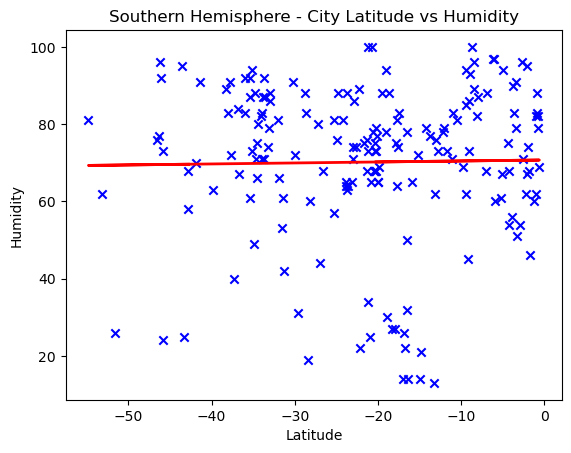

In [60]:
# Southern Hemisphere
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Humidity"]
x_label = "Latitude"
y_label = "Humidity"
hemisphere = "Southern" 
scat_mk = "x" 
scat_cl = "blue"
reg_cl = "red"
fig_name = "south_hem_Lat_humid"
lin_reg(x_value, y_value, x_label, y_label, hemisphere, reg_cl, scat_mk, scat_cl, fig_name, (10, 10))


**Discussion about the linear relationship:** 
There is no strong relationship between latitude and humidity. however there is a slightly larger cluster of northern hemisphere cities with high humidity (above 60% humidity)

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.024026517125811043
The correlation between both factors is 0.16


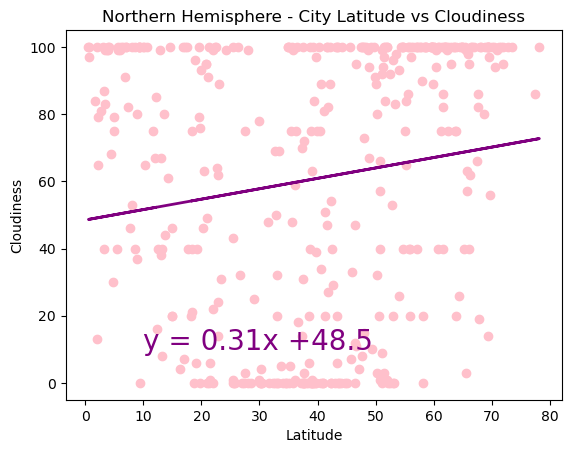

In [61]:
# Northern Hemisphere
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Cloudiness"]
x_label = "Latitude"
y_label = "Cloudiness"
hemisphere = "Northern" 
scat_mk = "o" 
scat_cl = "pink"
reg_cl = "purple"
fig_name = "north_hem_Lat_cloud"
lin_reg(x_value, y_value, x_label, y_label, hemisphere, reg_cl, scat_mk, scat_cl, fig_name, (10, 10))


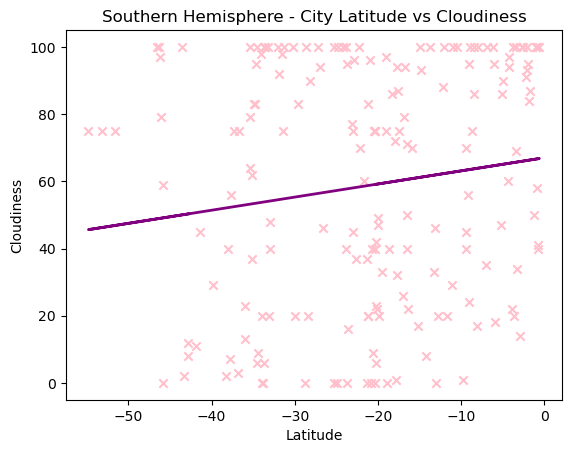

In [35]:
# Southern Hemisphere
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Cloudiness"]
x_label = "Latitude"
y_label = "Cloudiness"
hemisphere = "Southern" 
scat_mk = "x" 
scat_cl = "pink"
reg_cl = "purple"
fig_name = "south_hem_Lat_cloud"
lin_reg(x_value, y_value, x_label, y_label, hemisphere, reg_cl, scat_mk, scat_cl, fig_name, (10, 10))


**Discussion about the linear relationship:** There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities near 0, 80, and 90% cloudiness

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.030396762354449484
The correlation between both factors is 0.17


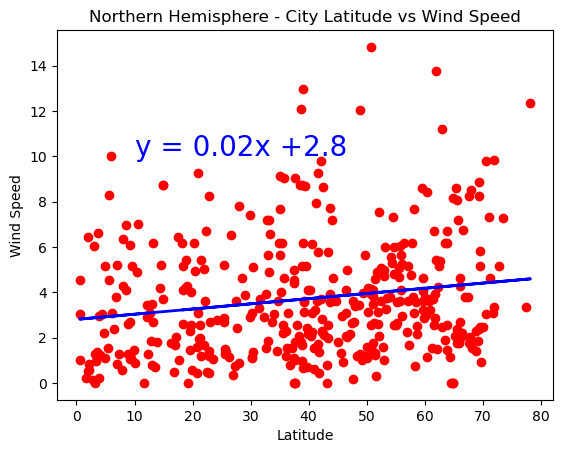

In [62]:
# Northern Hemisphere
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Wind Speed"]
x_label = "Latitude"
y_label = "Wind Speed"
hemisphere = "Northern" 
scat_mk = "o" 
scat_cl = "r"
reg_cl = "b"
fig_name = "north_hem_Lat_wind"
lin_reg(x_value, y_value, x_label, y_label, hemisphere, reg_cl, scat_mk, scat_cl, fig_name, (10, 10))


The r-squared is: 0.06223904070051575
The correlation between both factors is -0.25


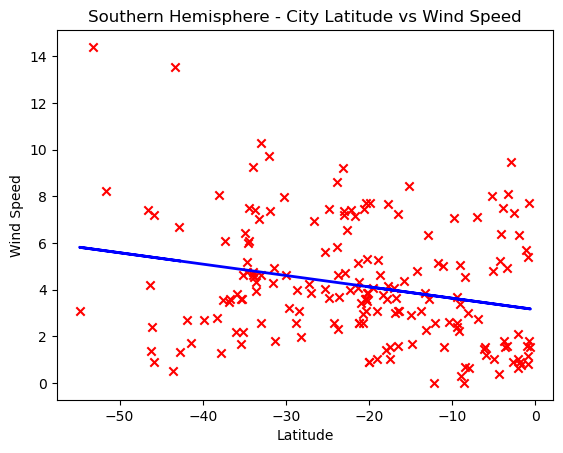

In [63]:
# Southern Hemisphere
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Wind Speed"]
x_label = "Latitude"
y_label = "Wind Speed"
hemisphere = "Southern" 
scat_mk = "x" 
scat_cl = "r"
reg_cl = "b"
fig_name = "south_hem_Lat_wind"
lin_reg(x_value, y_value, x_label, y_label, hemisphere, reg_cl, scat_mk, scat_cl, fig_name, (10, 10))

**Discussion about the linear relationship:** There is no strong relationship between latitude and wind speed. 